# 13.4.1 Ajuste del factor de aprendizaje

**Ajuste del factor de aprendizaje:** $\;$ necesario para garantizar la convergencia a una buena solución (en SGD en general)

## Ejemplo: MLP XOR

In [6]:
import numpy as np; np.set_printoptions(precision=4); import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]]) # etiquetas one-hot
W = tf.constant_initializer([[1, 1], [1, 1]]); b1 = tf.constant_initializer([-1,  .5])
V = tf.constant_initializer([[1, -1], [-1, 1]]); b2 = tf.constant_initializer([ 1, -1])
L1 = keras.layers.Dense(2, activation=tf.nn.relu, input_dim=2, kernel_initializer=W, bias_initializer=b1)
L2 = keras.layers.Dense(2, activation=tf.nn.softmax, kernel_initializer=V, bias_initializer=b2)
M = keras.Sequential([L1, L2])

**Planificador (scheduler):** $\;$ para reducir el learning rate a la mitad cada $25$ épocas

In [2]:
loss=tf.keras.losses.CategoricalCrossentropy()
epochs = 100; learning_rate=0.1
def lr_scheduler(epoch, learning_rate):
    decay_rate = 0.5; decay_step = 25
    if epoch % decay_step == 0 and epoch:
        return learning_rate * decay_rate
    return learning_rate
callback = [ keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=0) ]

**SGD:** $\;$ entrenamiento con SGD convencional

In [3]:
M_SGD = keras.models.clone_model(M)
M_SGD.compile(loss=loss, optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
M_SGD.fit(X, y, epochs=epochs, callbacks=callback, verbose=0);

**Adam:** $\;$ entrenamiento con Adam (muy popular)

In [4]:
M_Adam = keras.models.clone_model(M)
M_Adam.compile(loss=loss, optimizer=keras.optimizers.Adam(learning_rate=learning_rate))
M_Adam.fit(X, y, epochs=epochs, callbacks=callback, verbose=0);

Pérdidas, regiones y fronteras de las redes entrenadas:

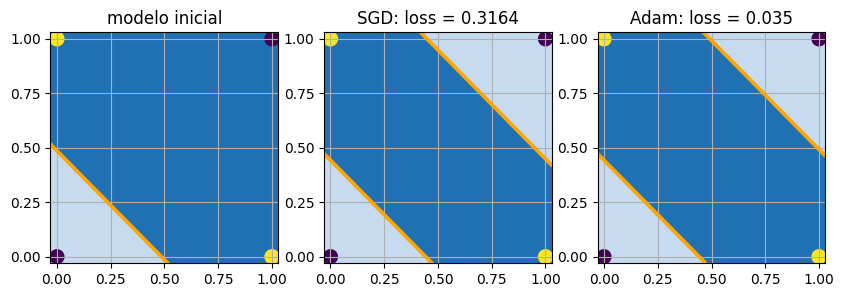

In [5]:
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]; ticks = [.0, .25, .5, .75, 1.]
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.grid(); ax.set_xticks(ticks); ax.set_yticks(ticks)
    match i:
        case 0: Mi = M; title = 'modelo inicial'
        case 1: Mi = M_SGD; title = 'SGD: loss = ' + str(Mi.evaluate(X, y, verbose=0))
        case 2: Mi = M_Adam; title = 'Adam: loss = ' + str(Mi.evaluate(X, y, verbose=0))
    ax.set_title(f'{title!s:.18s}')
    yy = np.argmax(Mi.predict(XX, verbose=0), axis=1)
    ax.contour(x1, x2, yy.reshape(x1.shape), 1, colors='orange', linestyles='solid')
    ax.contourf(x1, x2, yy.reshape(x1.shape), 1, cmap='Blues')
    ax.scatter(*X.T, c=np.argmax(y, axis=1), s=100);